In [1]:
# Load in the needed libraries to handle csv files and plots
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import chardet
# Sklearn libraries for ML
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder
from sklearn.preprocessing import normalize
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import RocCurveDisplay
# Improves matplotlib
import seaborn as sns
# Sklearn metrics for ML and hyperparameter tuning
from sklearn.model_selection import RandomizedSearchCV
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import RandomForestClassifier

In [3]:
# Solution to getting the encoding for the file was found at https://stackoverflow.com/questions/33819557/unicodedecodeerror-utf-8-codec-while-reading-a-csv-file
# Opens the file and reads the encoding in the csv
with open('Overbuff_scraped_22-04-2019.csv', 'rb') as f:
    enc = chardet.detect(f.read())

In [4]:
# Opens both csv files with the encoding and append them together into one dataframe
df1 = pd.read_csv('Overbuff_scraped_22-04-2019.csv', encoding = enc['encoding'])

In [5]:
df2 = pd.read_csv('Overbuff_scraped_24-05-2020.csv', encoding = enc['encoding'])

In [6]:
result = df1.append(df2)

C:\Users\khous\AppData\Local\Temp\ipykernel_53940\3416078118.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result = df1.append(df2)


In [7]:
# Shows data types and if there are null values
result.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1488 entries, 0 to 767
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Hero        1488 non-null   object 
 1   Role        1488 non-null   object 
 2   Pick_rate   1488 non-null   float64
 3   Win_rate    1488 non-null   float64
 4   Tie_Rate    1488 non-null   float64
 5   On_fire     1488 non-null   float64
 6   Platform    1488 non-null   object 
 7   Rank        1488 non-null   object 
 8   Date        1488 non-null   object 
 9   Unnamed: 0  768 non-null    float64
dtypes: float64(5), object(5)
memory usage: 127.9+ KB


In [8]:
# First 10 rows
result.head(10)

,Hero,Role,Pick_rate,Win_rate,Tie_Rate,On_fire,Platform,Rank,Date,Unnamed: 0
0,Reinhardt,TANK,10.08,49.85,2.75,7.33,XBL,All,2019-04-22 18:54:56,NaN
1,Moira,SUPPORT,7.40,51.00,2.55,9.59,XBL,All,2019-04-22 18:54:56,NaN
2,Mercy,SUPPORT,6.57,49.88,2.64,1.80,XBL,All,2019-04-22 18:54:56,NaN
3,Lúcio,SUPPORT,6.18,52.36,2.18,13.16,XBL,All,2019-04-22 18:54:56,NaN
4,D.Va,TANK,5.64,51.49,2.34,7.84,XBL,All,2019-04-22 18:54:56,NaN
5,Baptiste,SUPPORT,5.04,49.11,2.47,11.99,XBL,All,2019-04-22 18:54:56,NaN
6,Zarya,TANK,4.44,48.85,2.47,10.05,XBL,All,2019-04-22 18:54:56,NaN
7,Orisa,TANK,4.27,55.28,2.60,8.85,XBL,All,2019-04-22 18:54:56,NaN
8,Ana,SUPPORT,4.04,47.95,2.35,9.26,XBL,All,2019-04-22 18:54:56,NaN
9,Roadhog,TANK,3.89,50.91,1.95,10.07,XBL,All,2019-04-22 18:54:56,NaN


In [9]:
# Last 5 rows
result.tail()

,Hero,Role,Pick_rate,Win_rate,Tie_Rate,On_fire,Platform,Rank,Date,Unnamed: 0
763,Symmetra,SUPPORT,0.76,50.00,0.00,8.47,XBox,Grandmaster,2020-05-24 12:13:38.816996,27.0
764,Pharah,OFFENSE,0.76,60.81,0.00,20.39,XBox,Grandmaster,2020-05-24 12:13:38.816996,28.0
765,Mei,DEFENSE,0.74,41.43,2.78,4.77,XBox,Grandmaster,2020-05-24 12:13:38.816996,29.0
766,Winston,TANK,0.58,51.85,3.57,4.80,XBox,Grandmaster,2020-05-24 12:13:38.816996,30.0
767,Reaper,OFFENSE,0.54,70.00,3.85,10.70,XBox,Grandmaster,2020-05-24 12:13:38.816996,31.0


In [10]:
# Drops the unnamed col and then show summary statistics
result = result.drop(["Unnamed: 0"], axis = 1)
result.describe()

,Pick_rate,Win_rate,Tie_Rate,On_fire
count,1488.000000,1488.000000,1488.000000,1488.000000
mean,3.224167,50.521237,2.066962,9.458582
std,2.523596,4.710143,0.614549,3.376191
min,0.140000,13.330000,0.000000,1.080000
25%,1.487500,47.897500,1.750000,7.350000
50%,2.390000,50.635000,2.070000,9.365000
75%,4.110000,53.532500,2.440000,11.527500
max,15.230000,70.000000,5.080000,20.910000


In [11]:
# Shows the corrolation matrix of the data
result.corr()

,Pick_rate,Win_rate,Tie_Rate,On_fire
Pick_rate,1.000000,0.022422,0.180677,-0.142070
Win_rate,0.022422,1.000000,0.122209,0.222656
Tie_Rate,0.180677,0.122209,1.000000,0.098003
On_fire,-0.142070,0.222656,0.098003,1.000000


In [12]:
# Saved the new dataframe into a csv for later work
result.to_csv("Result.csv")

In [13]:
# Multiple ordinal encoders were created, each one encodes a different categorical variable
encoder1 = OrdinalEncoder()

In [14]:
# Fixes roles to be more accurate to the Overwatch 1 roles
role = result["Role"].to_numpy()
hero = result["Hero"].to_numpy()
for i in range(len(role)):
    if (hero[i] == "Symmetra"):
        role[i] = "DAMAGE"
    elif(hero[i] == "Torbjörn"):
        role[i] = "DAMAGE"
    elif(hero[i] == "Mei"):
        role[i] = "DAMAGE"
    elif(hero[i] == "Bastion"):
        role[i] = "DAMAGE"
    elif(hero[i] == "Widowmaker"):
        role[i] = "DAMAGE"
    elif(hero[i] == "Junkrat"):
        role[i] = "DAMAGE"
    elif(hero[i] == "Hanzo"):
        role[i] = "DAMAGE"
for i in range(len(role)):
    if(role[i] == "OFFENSE"):
        role[i] = "DAMAGE"

In [15]:
# Reassigns the updated roles to the Roles column
result["Role"] = role

In [16]:
# Fixes the spelling mistakes and any misses from the previous loop and updates the result csv
role = result["Role"].to_numpy()
hero = result["Hero"].to_numpy()
for i in range(len(hero)):
    if(role[i] == "DEFENSE"):
        hero[i] = "Torbjörn"
        role[i] = "DAMAGE"
    if(hero[i] =="LÃºcio"):
        hero[i] = "Lúcio"
result["Hero"] = hero
result["Role"] = role
result.to_csv("Result.csv")

In [17]:
# Encodes role
role = result[["Role"]]
encoder1.fit(role)
role = encoder1.transform(role)

In [18]:
# Creates a new column called Role encoded
result['Role_encoded'] = role

In [19]:
# Encodes Hero names
encoder2 = OrdinalEncoder()
hero = result[["Hero"]]
encoder2.fit(hero)
hero = encoder2.transform(hero)

In [20]:
# Assigns them to a new column called Hero encoded
result['Hero_encoded'] = hero

In [21]:
# Shows the updated dataframe
result.head()

,Hero,Role,Pick_rate,Win_rate,Tie_Rate,On_fire,Platform,Rank,Date,Role_encoded,Hero_encoded
0,Reinhardt,TANK,10.08,49.85,2.75,7.33,XBL,All,2019-04-22 18:54:56,2.0,19.0
1,Moira,SUPPORT,7.40,51.00,2.55,9.59,XBL,All,2019-04-22 18:54:56,1.0,15.0
2,Mercy,SUPPORT,6.57,49.88,2.64,1.80,XBL,All,2019-04-22 18:54:56,1.0,14.0
3,Lúcio,SUPPORT,6.18,52.36,2.18,13.16,XBL,All,2019-04-22 18:54:56,1.0,11.0
4,D.Va,TANK,5.64,51.49,2.34,7.84,XBL,All,2019-04-22 18:54:56,2.0,5.0


In [22]:
# Updated corrolation matrix
result.corr()

,Pick_rate,Win_rate,Tie_Rate,On_fire,Role_encoded,Hero_encoded
Pick_rate,1.000000,0.022422,0.180677,-0.142070,0.454403,-0.079852
Win_rate,0.022422,1.000000,0.122209,0.222656,-0.003843,0.001615
Tie_Rate,0.180677,0.122209,1.000000,0.098003,0.056537,-0.113548
On_fire,-0.142070,0.222656,0.098003,1.000000,-0.343330,-0.225739
Role_encoded,0.454403,-0.003843,0.056537,-0.343330,1.000000,0.209742
Hero_encoded,-0.079852,0.001615,-0.113548,-0.225739,0.209742,1.000000


In [23]:
# Encodes the platform and creates a new column called Platform encoded
encoder3 = OrdinalEncoder()
console = result[["Platform"]]
encoder3.fit(console)
console = encoder3.transform(console)
result['Platform_encoded'] = console

In [24]:
# Encodes Rank and creates a new column called Rank encoded
encoder4 = OrdinalEncoder()
rank = result[["Rank"]]
encoder4.fit(rank)
rank = encoder4.transform(rank)
result['Rank_encoded'] = rank

In [25]:
# Updated corrolation matrix
result.head()

,Hero,Role,Pick_rate,Win_rate,Tie_Rate,On_fire,Platform,Rank,Date,Role_encoded,Hero_encoded,Platform_encoded,Rank_encoded
0,Reinhardt,TANK,10.08,49.85,2.75,7.33,XBL,All,2019-04-22 18:54:56,2.0,19.0,2.0,0.0
1,Moira,SUPPORT,7.40,51.00,2.55,9.59,XBL,All,2019-04-22 18:54:56,1.0,15.0,2.0,0.0
2,Mercy,SUPPORT,6.57,49.88,2.64,1.80,XBL,All,2019-04-22 18:54:56,1.0,14.0,2.0,0.0
3,Lúcio,SUPPORT,6.18,52.36,2.18,13.16,XBL,All,2019-04-22 18:54:56,1.0,11.0,2.0,0.0
4,D.Va,TANK,5.64,51.49,2.34,7.84,XBL,All,2019-04-22 18:54:56,2.0,5.0,2.0,0.0


In [26]:
# Updated corrolation matrix
# Our target is Role, and we see that Pick rate, on fire, and the hero names are corrolated with role
# Pick rate being the highest of the three. Adding in Win rate to see if this has any affect
result.corr()

,Pick_rate,Win_rate,Tie_Rate,On_fire,Role_encoded,Hero_encoded,Platform_encoded,Rank_encoded
Pick_rate,1.000000,0.022422,0.180677,-0.142070,0.454403,-0.079852,-5.662575e-03,-1.978806e-03
Win_rate,0.022422,1.000000,0.122209,0.222656,-0.003843,0.001615,-3.574566e-02,8.831763e-02
Tie_Rate,0.180677,0.122209,1.000000,0.098003,0.056537,-0.113548,-1.027063e-02,1.216960e-02
On_fire,-0.142070,0.222656,0.098003,1.000000,-0.343330,-0.225739,4.321902e-02,1.343569e-02
Role_encoded,0.454403,-0.003843,0.056537,-0.343330,1.000000,0.209742,7.361081e-04,-1.410312e-03
Hero_encoded,-0.079852,0.001615,-0.113548,-0.225739,0.209742,1.000000,-2.382400e-03,-1.216272e-03
Platform_encoded,-0.005663,-0.035746,-0.010271,0.043219,0.000736,-0.002382,1.000000e+00,-4.745590e-17
Rank_encoded,-0.001979,0.088318,0.012170,0.013436,-0.001410,-0.001216,-4.745590e-17,1.000000e+00


In [27]:
# Our target variable: Role
Y = result["Role"]

In [28]:
# Our features variables
X = result.loc[:, ["Pick_rate", "On_fire", "Hero_encoded", "Win_rate"]]
X

,Pick_rate,On_fire,Hero_encoded,Win_rate
0,10.08,7.33,19.0,49.85
1,7.40,9.59,15.0,51.00
2,6.57,1.80,14.0,49.88
3,6.18,13.16,11.0,52.36
4,5.64,7.84,5.0,51.49
...,...,...,...,...
763,0.76,8.47,24.0,50.00
764,0.76,20.39,17.0,60.81
765,0.74,4.77,13.0,41.43
766,0.58,4.80,28.0,51.85


Text(0.5, 1.0, 'Distribution of Win rates')

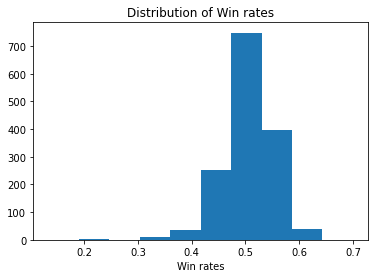

In [35]:
# Distribution of win rates
plt.hist(result["Win_rate"].to_numpy()/100)
plt.xlabel("Win rates")
plt.title("Distribution of Win rates")

Text(0.5, 1.0, 'Distribution of Pick rate')

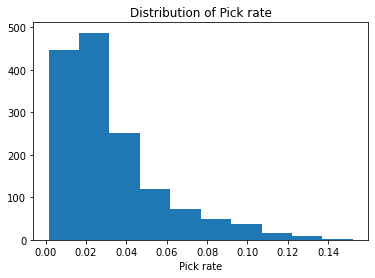

In [36]:
# Distribution of Pick rate
plt.hist(result["Pick_rate"].to_numpy()/100)
plt.xlabel("Pick rate")
plt.title("Distribution of Pick rate")

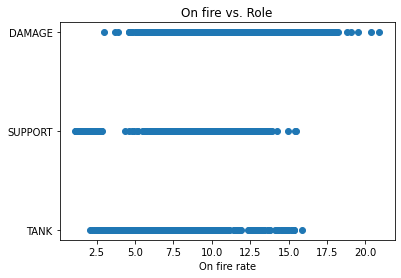

In [30]:
# Scatter plot of roles vs on fire
plt.scatter(result["On_fire"].to_numpy(), result["Role"].to_numpy())
plt.xlabel("On fire rate")
plt.title("On fire vs. Role")
plt.show()

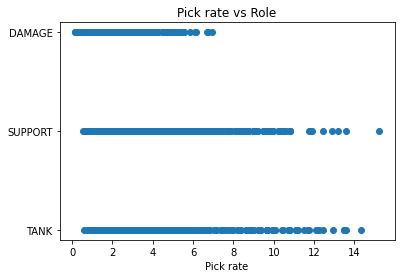

In [31]:
# Pick rates vs roles scatter plot
plt.scatter(result["Pick_rate"].to_numpy(), result["Role"].to_numpy())
plt.xlabel("Pick rate")
plt.title("Pick rate vs Role")
plt.show()

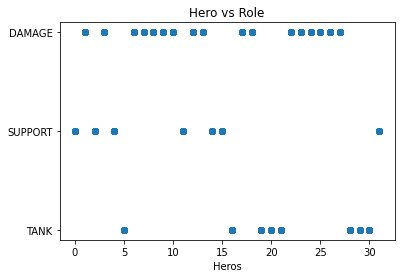

In [32]:
# Hero vs role
# More damage than any other class
plt.scatter(result["Hero_encoded"].to_numpy(), result["Role"].to_numpy())
plt.xlabel("Heros")
plt.title("Hero vs Role")
plt.show()

In [33]:
# The initial svm model
svc = SVC()

In [34]:
# Creates the test train split, 70-30 split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3) 

In [35]:
# Fits the model
svc.fit(X_train, y_train)

SVC()

In [36]:
# Stores the predictions using x test
pred_test = svc.predict(X_test)

In [37]:
# Prints the classification results
print(classification_report(y_test, pred_test))

              precision    recall  f1-score   support

      DAMAGE       0.70      0.92      0.80       252
     SUPPORT       0.54      0.21      0.30        96
        TANK       0.61      0.48      0.54        99

    accuracy                           0.67       447
   macro avg       0.62      0.54      0.55       447
weighted avg       0.65      0.67      0.63       447



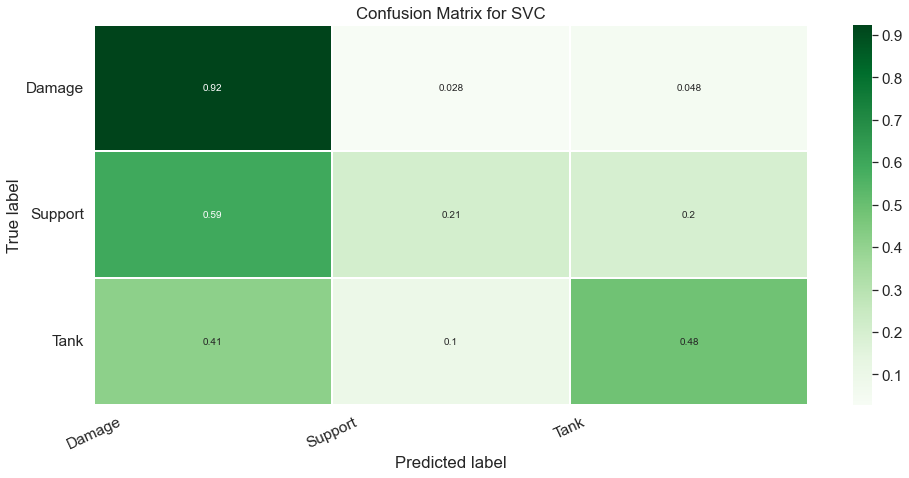

In [38]:
# Creates the confusion matrix for the SVM model
matrix = confusion_matrix(y_test, pred_test)
matrix = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]

# Build the plot
plt.figure(figsize=(16,7))
sns.set(font_scale=1.4)
sns.heatmap(matrix, annot=True, annot_kws={'size':10},
            cmap=plt.cm.Greens, linewidths=0.2)

# Add labels to the plot
class_names = ['Damage', 'Support', "Tank"]
tick_marks = np.arange(len(class_names))
tick_marks2 = tick_marks + 0.5
plt.xticks(tick_marks, class_names, rotation=25)
plt.yticks(tick_marks2, class_names, rotation=0)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix for SVC')
plt.show()

In [39]:
# Creates the grid of parameters for random grid search
param_grid = {'C': [1, 10, 100, 1000, 10000], 
              'gamma': ["scale", "auto"],
              'kernel': ['linear', 'rbf']} 

In [40]:
# Creates the random grid
grid = RandomizedSearchCV(SVC(), param_grid, refit = True, verbose = 5)

In [41]:
# Fits the training set to the grid
grid.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5] END ....C=1, gamma=auto, kernel=linear;, score=0.708 total time=   0.0s
[CV 2/5] END ....C=1, gamma=auto, kernel=linear;, score=0.750 total time=   0.0s
[CV 3/5] END ....C=1, gamma=auto, kernel=linear;, score=0.712 total time=   0.0s
[CV 4/5] END ....C=1, gamma=auto, kernel=linear;, score=0.755 total time=   0.0s
[CV 5/5] END ....C=1, gamma=auto, kernel=linear;, score=0.716 total time=   0.0s
[CV 1/5] END C=10000, gamma=auto, kernel=linear;, score=0.718 total time=  19.3s
[CV 2/5] END C=10000, gamma=auto, kernel=linear;, score=0.745 total time=  22.3s
[CV 3/5] END C=10000, gamma=auto, kernel=linear;, score=0.707 total time=  24.4s
[CV 4/5] END C=10000, gamma=auto, kernel=linear;, score=0.774 total time=  22.2s
[CV 5/5] END C=10000, gamma=auto, kernel=linear;, score=0.736 total time=  23.8s
[CV 1/5] END ......C=1, gamma=scale, kernel=rbf;, score=0.737 total time=   0.0s
[CV 2/5] END ......C=1, gamma=scale, kernel=rbf;

RandomizedSearchCV(estimator=SVC(),
                   param_distributions={'C': [1, 10, 100, 1000, 10000],
                                        'gamma': ['scale', 'auto'],
                                        'kernel': ['linear', 'rbf']},
                   verbose=5)

In [42]:
# Best parameters found in the grid
print(grid.best_params_)

{'kernel': 'rbf', 'gamma': 'scale', 'C': 10000}


In [43]:
# Similar to above
print(grid.best_estimator_)

SVC(C=10000)


In [44]:
# Stores the prediction from the fit
grid_predictions = grid.predict(X_test)
  
# print classification report
print(classification_report(y_test, grid_predictions))

              precision    recall  f1-score   support

      DAMAGE       0.84      0.90      0.87       252
     SUPPORT       0.84      0.75      0.79        96
        TANK       0.85      0.80      0.82        99

    accuracy                           0.84       447
   macro avg       0.84      0.81      0.83       447
weighted avg       0.84      0.84      0.84       447



In [76]:
# The next block fo code is showing the same results from the random grid search
svc = SVC(C = 10000, kernel='rbf', gamma = 'auto')

In [77]:
svc.fit(X_train, y_train)

SVC(C=10000, gamma='auto')

In [78]:
pred_test = svc.predict(X_test)

In [79]:
print(classification_report(y_test, pred_test))

              precision    recall  f1-score   support

      DAMAGE       0.93      0.97      0.95       252
     SUPPORT       0.93      0.86      0.90        96
        TANK       0.99      0.95      0.97        99

    accuracy                           0.94       447
   macro avg       0.95      0.93      0.94       447
weighted avg       0.94      0.94      0.94       447



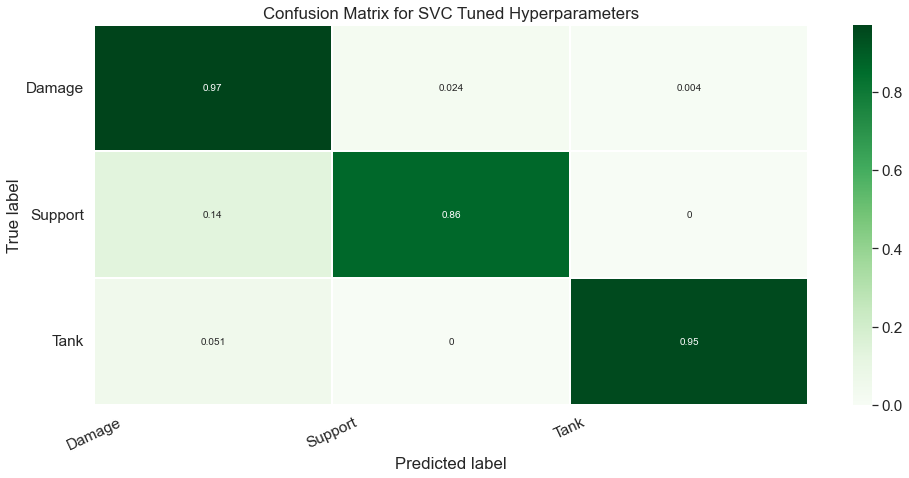

In [80]:
# Creates the confusion matrix for the tuned SVM model
# Get and reshape confusion matrix data
matrix = confusion_matrix(y_test, pred_test)
matrix = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]

# Build the plot
plt.figure(figsize=(16,7))
sns.set(font_scale=1.4)
sns.heatmap(matrix, annot=True, annot_kws={'size':10},
            cmap=plt.cm.Greens, linewidths=0.2)

# Add labels to the plot
class_names = ['Damage', 'Support', "Tank"]
tick_marks = np.arange(len(class_names))
tick_marks2 = tick_marks + 0.5
plt.xticks(tick_marks, class_names, rotation=25)
plt.yticks(tick_marks2, class_names, rotation=0)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix for SVC Tuned Hyperparameters')
plt.show()

In [50]:
# Creates the initial KNN model
knn = KNeighborsClassifier()

In [51]:
# Fits the model to our training set
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [52]:
# Grab our predictions
pred_test = knn.predict(X_test)

In [53]:
# Prints the classification report
print(classification_report(y_test, pred_test))

              precision    recall  f1-score   support

      DAMAGE       0.93      0.93      0.93       252
     SUPPORT       0.88      0.89      0.88        96
        TANK       0.94      0.93      0.93        99

    accuracy                           0.92       447
   macro avg       0.92      0.92      0.92       447
weighted avg       0.92      0.92      0.92       447



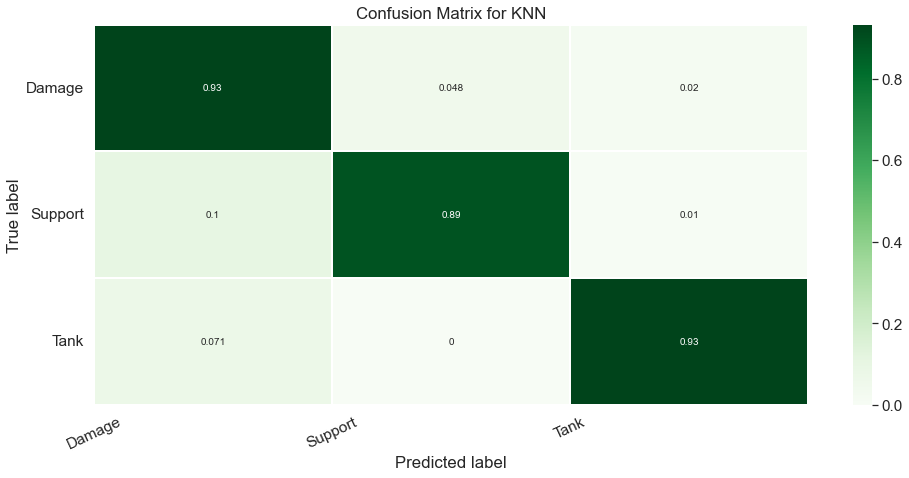

In [54]:
# Creates the confusion matrix for the KNN
# Get and reshape confusion matrix data
matrix = confusion_matrix(y_test, pred_test)
matrix = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]

# Build the plot
plt.figure(figsize=(16,7))
sns.set(font_scale=1.4)
sns.heatmap(matrix, annot=True, annot_kws={'size':10},
            cmap=plt.cm.Greens, linewidths=0.2)

# Add labels to the plot
class_names = ['Damage', 'Support', "Tank"]
tick_marks = np.arange(len(class_names))
tick_marks2 = tick_marks + 0.5
plt.xticks(tick_marks, class_names, rotation=25)
plt.yticks(tick_marks2, class_names, rotation=0)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix for KNN')
plt.show()

In [55]:
# Create our intial random forest
rfc = RandomForestClassifier()

In [56]:
# Fits the training data
rfc.fit(X_train, y_train)

RandomForestClassifier()

In [57]:
# Stores our predictions
pred_test = rfc.predict(X_test)

In [58]:
# Prints the classification report
print(classification_report(y_test, pred_test))

              precision    recall  f1-score   support

      DAMAGE       0.97      0.97      0.97       252
     SUPPORT       0.93      0.94      0.93        96
        TANK       0.99      0.98      0.98        99

    accuracy                           0.96       447
   macro avg       0.96      0.96      0.96       447
weighted avg       0.96      0.96      0.96       447



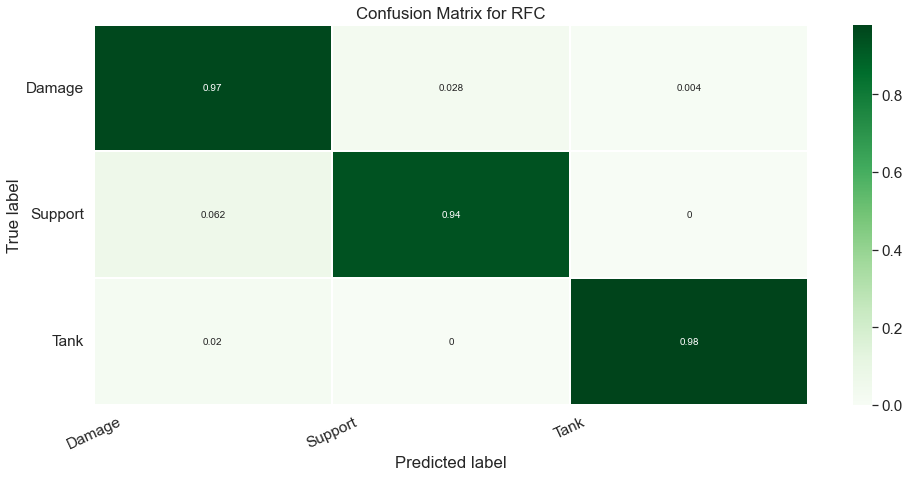

In [59]:
# Creates the confusion matrix for the random forest
# Get and reshape confusion matrix data
matrix = confusion_matrix(y_test, pred_test)
matrix = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]

# Build the plot
plt.figure(figsize=(16,7))
sns.set(font_scale=1.4)
sns.heatmap(matrix, annot=True, annot_kws={'size':10},
            cmap=plt.cm.Greens, linewidths=0.2)

# Add labels to the plot
class_names = ['Damage', 'Support', "Tank"]
tick_marks = np.arange(len(class_names))
tick_marks2 = tick_marks + 0.5
plt.xticks(tick_marks, class_names, rotation=25)
plt.yticks(tick_marks2, class_names, rotation=0)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix for RFC')
plt.show()

In [60]:
# Our random grid for the random grid search for the random forest
n_estimators = [5, 10, 20, 50, 100, 120, 140, 160] # number of trees in the random forest
max_features = ['auto', 'sqrt'] # number of features in consideration at every split
max_depth = [int(x) for x in np.linspace(10, 120, num = 12)] # maximum number of levels allowed in each decision tree
min_samples_split = [2, 4, 6, 8, 10] # minimum sample number to split a node
min_samples_leaf = [1, 3, 4] # minimum sample number that can be stored in a leaf node
bootstrap = [True, False] # method used to sample data points

random_grid = {'n_estimators': n_estimators,

'max_features': max_features,

'max_depth': max_depth,

'min_samples_split': min_samples_split,

'min_samples_leaf': min_samples_leaf,

'bootstrap': bootstrap}

In [61]:
# Creates the random search
rf_random = RandomizedSearchCV(estimator = rfc,param_distributions = random_grid,
               n_iter = 100, cv = 5, verbose=2, random_state=35, n_jobs = -1)

In [62]:
# Fits the search to our data
rf_random.fit(X_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      120],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 3, 4],
                                        'min_samples_split': [2, 4, 6, 8, 10],
                                        'n_estimators': [5, 10, 20, 50, 100,
                                                         120, 140, 160]},
                   random_state=35, verbose=2)

In [63]:
# Shows our best hyperparameters
print ('Random grid: ', random_grid, '\n')
# print the best parameters
print ('Best Parameters: ', rf_random.best_params_, ' \n')

Random grid:  {'n_estimators': [5, 10, 20, 50, 100, 120, 140, 160], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120], 'min_samples_split': [2, 4, 6, 8, 10], 'min_samples_leaf': [1, 3, 4], 'bootstrap': [True, False]} 

Best Parameters:  {'n_estimators': 140, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 90, 'bootstrap': False}  



In [84]:
# Applies our best parameters to our random forest

rfc = RandomForestClassifier(n_estimators = 140, min_samples_split = 2, min_samples_leaf = 1, max_features = 'sqrt', max_depth = 90, bootstrap = False)

In [85]:
# Fits the data
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=False, max_depth=90, max_features='sqrt',
                       n_estimators=140)

In [86]:
# Stores our prediction
pred_test = rfc.predict(X_test)

In [87]:
# Prints the classification report
print(classification_report(y_test, pred_test))

              precision    recall  f1-score   support

      DAMAGE       0.97      0.98      0.97       252
     SUPPORT       0.95      0.93      0.94        96
        TANK       0.98      0.98      0.98        99

    accuracy                           0.97       447
   macro avg       0.97      0.96      0.96       447
weighted avg       0.97      0.97      0.97       447



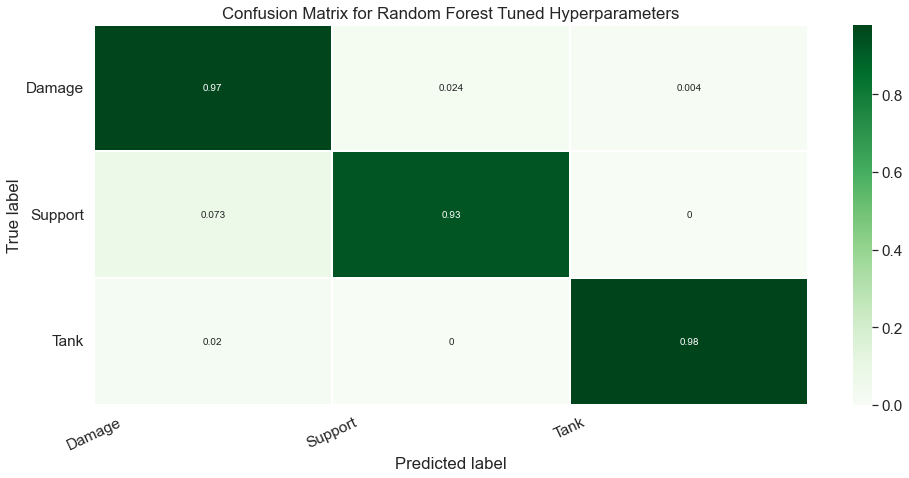

In [68]:
# Creates the confusion matrix for the tuned random forest
# Get and reshape confusion matrix data
matrix = confusion_matrix(y_test, pred_test)
matrix = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]

# Build the plot
plt.figure(figsize=(16,7))
sns.set(font_scale=1.4)
sns.heatmap(matrix, annot=True, annot_kws={'size':10},
            cmap=plt.cm.Greens, linewidths=0.2)

# Add labels to the plot
class_names = ['Damage', 'Support', "Tank"]
tick_marks = np.arange(len(class_names))
tick_marks2 = tick_marks + 0.5
plt.xticks(tick_marks, class_names, rotation=25)
plt.yticks(tick_marks2, class_names, rotation=0)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix for Random Forest Tuned Hyperparameters')
plt.show()

In [88]:
# creates the n for KNN
n_sqrt = np.sqrt(X_train.shape[0])

In [89]:
# Creates the KNN with the new N + 1
knn = knn = KNeighborsClassifier(n_neighbors = int(n_sqrt)+1)

In [90]:
# Fits in the data
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=33)

In [91]:
# Stores the prediction
pred_test = knn.predict(X_test)

In [92]:
# Shows the classification report
print(classification_report(y_test, pred_test))

              precision    recall  f1-score   support

      DAMAGE       0.87      0.92      0.89       252
     SUPPORT       0.83      0.75      0.79        96
        TANK       0.87      0.83      0.85        99

    accuracy                           0.86       447
   macro avg       0.86      0.83      0.84       447
weighted avg       0.86      0.86      0.86       447



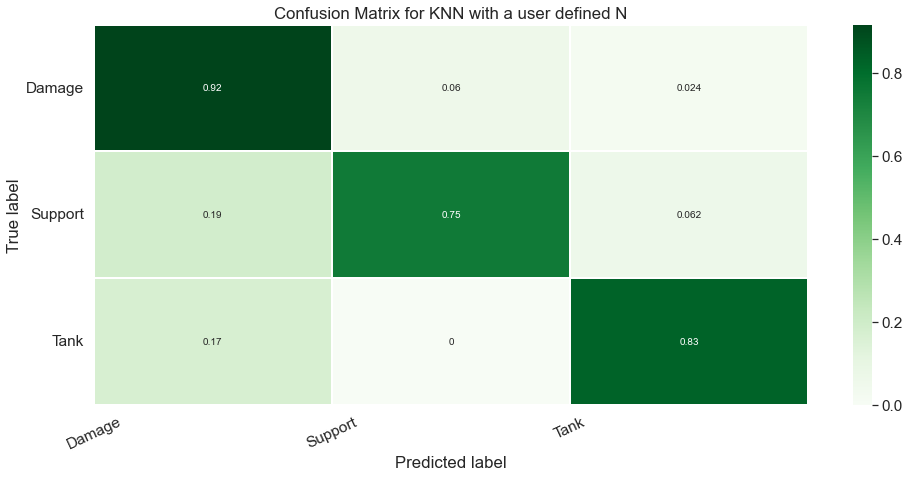

In [93]:
# Creates the confusion matrix for KNN with new N
# Get and reshape confusion matrix data
matrix = confusion_matrix(y_test, pred_test)
matrix = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]

# Build the plot
plt.figure(figsize=(16,7))
sns.set(font_scale=1.4)
sns.heatmap(matrix, annot=True, annot_kws={'size':10},
            cmap=plt.cm.Greens, linewidths=0.2)

# Add labels to the plot
class_names = ['Damage', 'Support', "Tank"]
tick_marks = np.arange(len(class_names))
tick_marks2 = tick_marks + 0.5
plt.xticks(tick_marks, class_names, rotation=25)
plt.yticks(tick_marks2, class_names, rotation=0)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix for KNN with a user defined N')
plt.show()

In [75]:
# Creates a pickle file that stores our model
import pickle 
pickle_out = open("classifier.pkl", mode = "wb") 
pickle.dump(rfc, pickle_out) 
pickle_out.close()

In [95]:
encoder2.categories_

[array(['Ana', 'Ashe', 'Baptiste', 'Bastion', 'Brigitte', 'D.Va',
        'Doomfist', 'Echo', 'Genji', 'Hanzo', 'Junkrat', 'Lúcio', 'McCree',
        'Mei', 'Mercy', 'Moira', 'Orisa', 'Pharah', 'Reaper', 'Reinhardt',
        'Roadhog', 'Sigma', 'Soldier: 76', 'Sombra', 'Symmetra',
        'Torbjörn', 'Tracer', 'Widowmaker', 'Winston', 'Wrecking Ball',
        'Zarya', 'Zenyatta'], dtype=object)]